# **WELDRight**
-Imbalanced timeSeries classification model
<br>
<br>


1.   Research
2.   Reading the Data
3.   Cleaning the Data
3.   Pre-Processing
5.   Splitting Dataset
6.   Training
7.   Predicting and Conversion 
8.   Testing and Scores
9.   ROI 
10.  TCO
11. Business Impact
<br>
<br>

# **Research**


**Defects** : Tungsten Inclusion , Porosity
<br><br>


> **Tungsten Inclusion**
>>* Tungsten inclusions are caused by tungsten dipping in the puddle, getting broken off after sticking it the puddle, or spraying in the puddle from using too large an electrode.
*   Exceeding the amperage carrying capability of a certain size electrode will also cause the tungsten to tak\e a crap in the puddle.

---
>**Porosity**
>>*   Porosity is caused by the absorption of nitrogen, oxygen and hydrogen in the molten weld pool which is then released on solidification to become trapped in the weld metal.
>*   Nitrogen and oxygen absorption in the weld pool usually originates from poor gas shielding
---


> **Reference**

>>*   https://www.twi-global.com/technical-knowledge/job-knowledge/defects-imperfections-in-welds-porosity-042#:~:text=Porosity%20is%20caused%20by%20the,originates%20from%20poor%20gas%20shielding.
*   https://www.weldingtipsandtricks.com/tungsten-inclusions.html
*   https://www.researchgate.net/figure/Tungsten-inclusion-thermograph_fig1_264844735


<hr>
<br>
<img src="">
<div align="center">
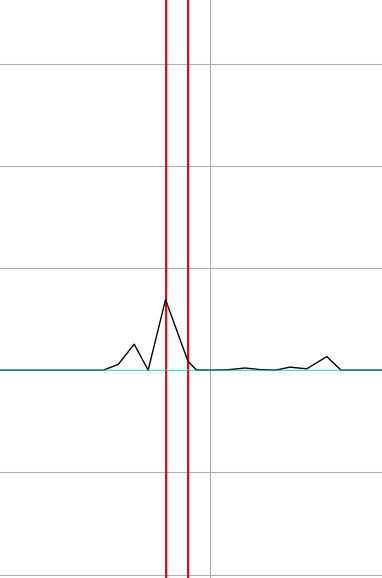


<br>

<hr>


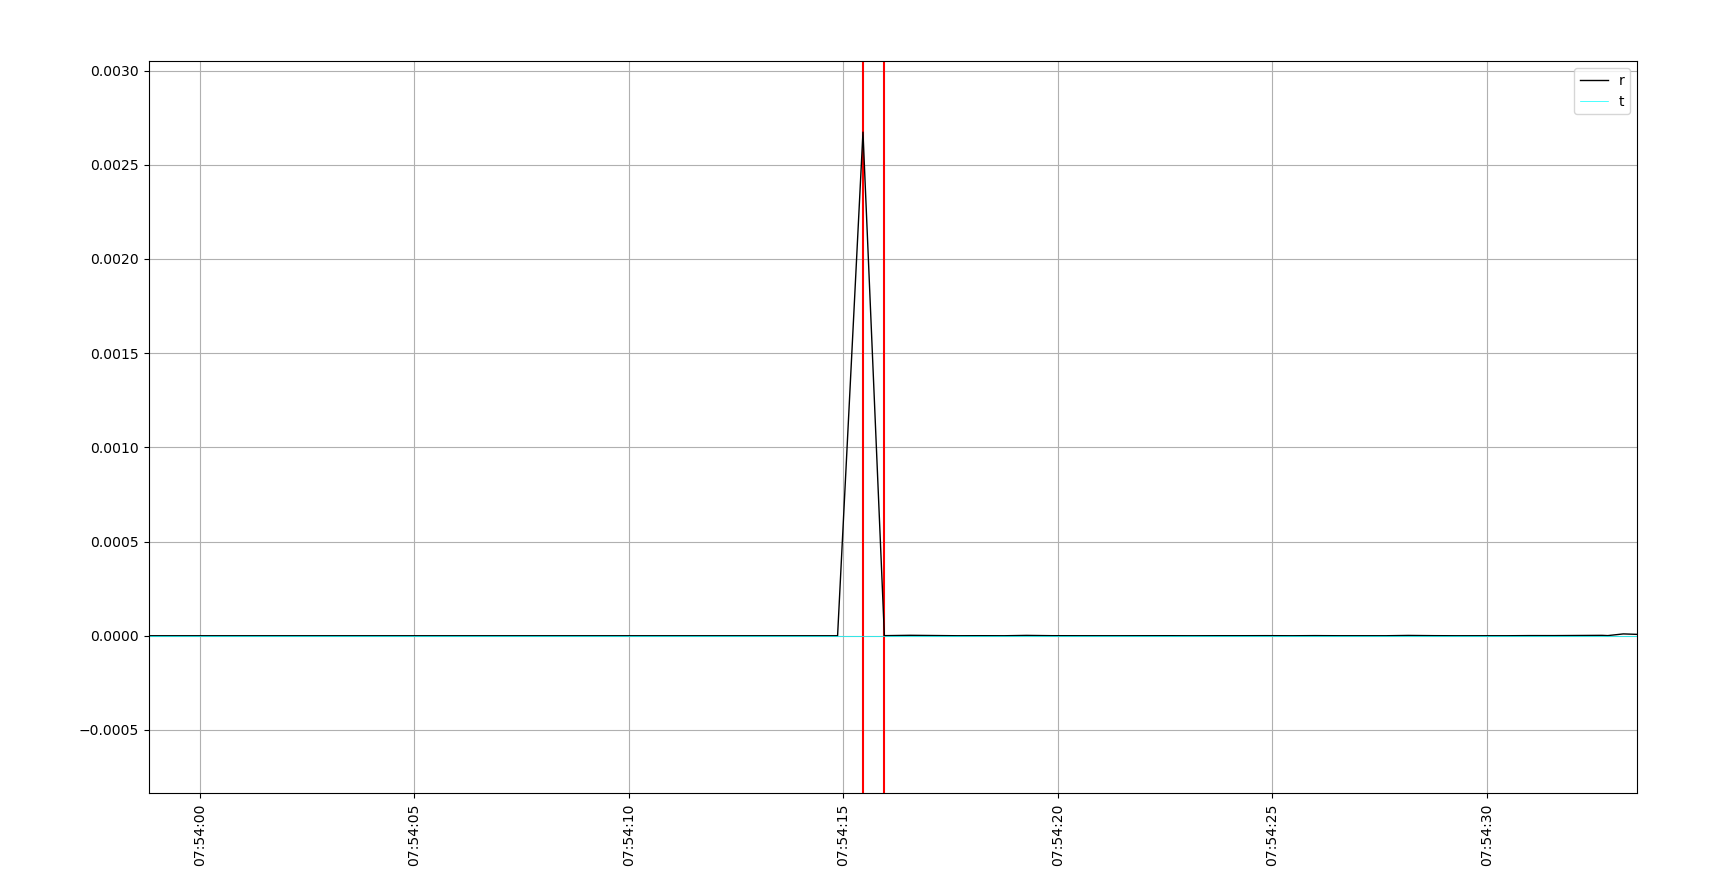



<hr>

>The red lines are tungsten inclusions and the black line is a function of change in current times changes in voltage 
This shows that the change in power causes a spike which is a feature to detect the tungsten inclusion.


# **Mounting on Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


# **Reading the Dataset**

Reading the Training dataset from drive.



In [1]:
import pandas as pd
import numpy as np

df=pd.read_csv('https://docs.google.com/spreadsheets/d/1DzPcIHzyPdBWqW3J4Ra00UBkCUccpMnC/edit?usp=sharing&ouid=101159146233993491027&rtpof=true&sd=true')

In [ ]:
# #you can add your dataset here 
df=pd.read_csv('/content/CBM_WM6undefined_Oct_30.csv')

#reset the column names 
df.columns =  ['Company Name', 'Employee Code', 'Machine', 'Production', 'Order Operation No', 'Date',
       'Time', 'Current', 'Humidity', 'Temperature', 'Flow', 'Job Temp',
       'Voltage', 'Defect']


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,1,4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# **Cleaning the Dataset**





*   In defect column, several entry mistakes such as defect40, Tungusten Inclusion75, etc... were fixed to their respective classes.
* In other columns, several entries were string. we typecasted those entries to integers.



In [ ]:


def clean(df):
  print("Before cleaning defect column")
  list_req = list(df.groupby('Defect').groups.keys())
  print(list_req)
  map_defect={};
  for i in list_req:
    if(i.find('No Defect')>=0):
      map_defect[i]="No Defect"
    if(i.find('Porosity')>=0):
      map_defect[i]="Porosity"
    if(i.find('Tungsten Inclusion')>=0):
      map_defect[i]="Tungsten Inclusion"

  df["Defect"] = df["Defect"].map(map_defect)

  print("After cleaning defect column")
  list_req = list(df.groupby('Defect').groups.keys())
  print(list_req)

  print("Before cleaning column")
  df.isnull().sum()
  list_req = list(df.groupby('Employee Code').groups.keys())
  print("Before cleaning Employee Code column")
  print(list_req)
  m={}
  for i in range(len(list_req)):
    if(isinstance (list_req[i],str)):
      try:
        s=int(list_req[i])
        m[list_req[i]]=s;
      except:
        m[list_req[i]]=0
    else:
      m[list_req[i]]=list_req[i]

  print("After cleaning Employee Code column")
  df["Employee Code"] = df["Employee Code"].map(m)
  print("After cleaning defect column")
  list_req = list(df.groupby('Employee Code').groups.keys())
  print(list_req)
  print(" ")
  print("Before cleaning the Order Operation No column")
  df.isnull().sum()
  list_req = list(df.groupby('Order Operation No').groups.keys())
  print(list_req)
  m={}
  for i in range(len(list_req)):
    if(isinstance (list_req[i],str)):
      try:
        s=int(list_req[i])
        m[list_req[i]]=abs(s);
      except:
        m[list_req[i]]=0
    else:
      m[list_req[i]]=list_req[i]

  print(m)
  df["Order Operation No"] = df["Order Operation No"].map(m)
  print("After cleaning the Order Operation No column")

  print(" ")
  list_req = list(df.groupby('Order Operation No').groups.keys())
  print(list_req)

  print(" ")
  print("Before cleaning the column")
  list_req = list(df.groupby('Humidity').groups.keys())
  m={};
  for i in list_req:
    if(isinstance(i, str)):
        if(i=="(Relative humidity in %)"):
          m[i]=0;
        else:
          m[i]=float(i);
    else:
        m[i]=i;
  df["Humidity"] = df["Humidity"].map(m)
  print(" ")
  print("After cleaning the column")
  list_req = list(df.groupby('Humidity').groups.keys())
  print(list_req)
  print(" ")
  print("Before cleaning the column")
  list_req = list(df.groupby('Current').groups.keys())
  print(list_req)
  m={};
  for i in range(len(list_req)):
    if(isinstance (list_req[i],str)):
      try:
        s=float(list_req[i])
        m[list_req[i]]=abs(s);
      except:
        m[list_req[i]]=0
    else:
      m[list_req[i]]=list_req[i]
  print(m)
  df["Current"] = df["Current"].map(m)
  print("After cleaning the column")
  list_req = list(df.groupby('Current').groups.keys())
  print(list_req)
  print("Before cleaning the column")
  list_req = list(df.groupby('Voltage').groups.keys())
  print(list_req)
  m={};
  for i in range(len(list_req)):
    if(isinstance (list_req[i],str)):
      try:
        s=float(list_req[i])
        m[list_req[i]]=abs(s);
      except:
        m[list_req[i]]=0
    else:
      m[list_req[i]]=list_req[i]
  print(m)
  df["Voltage"] = df["Voltage"].map(m)
  print("After cleaning the column")
  list_req = list(df.groupby('Voltage').groups.keys())
  print(list_req)

  df['datetime'] = df['Date']+" "+df['Time']
  df=df[['Order Operation No','Employee Code','datetime','Current','Voltage','Humidity','Temperature', 'Job Temp','Flow','Defect']]
  df=df[1:]

  return df


df = clean(df)
df.head()

Before cleaning defect column
['No Defect', 'No defect', 'Tungsten Inclusion']
After cleaning defect column
['No Defect', 'Tungsten Inclusion']
Before cleaning column
Before cleaning Employee Code column
[0, 391342, '0', '377680', '382617', '384292', '390141', '391342', 'undefined']
After cleaning Employee Code column
After cleaning defect column
[0, 377680, 382617, 384292, 390141, 391342]
 
Before cleaning the Order Operation No column
[182, 240, '182', '240', 'undefined']
{182: 182, 240: 240, '182': 182, '240': 240, 'undefined': 0}
After cleaning the Order Operation No column
 
[0, 182, 240]
 
Before cleaning the column
 
After cleaning the column
[0, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 66, 67, 68, 69, 70, 3306]
 
Before cleaning the column
[-221.4, -74.34375, -73.66875, -60.525, -50.7, -48.4125, -48.0375, -46.2, -45.39375, -43.44375, -42.375, -42.0375, -39.3375, -38.4, -38.30625, -35.34375, -34.74375, -3

,Order Operation No,Employee Code,datetime,Current,Voltage,Humidity,Temperature,Job Temp,Flow,Defect
1,0,0,10/11/2022 7:37:9:231,39.15000,11.585,57,23,30.7,0.093,NaN
2,0,0,10/11/2022 7:37:9:731,33.28125,10.087,57,23,29.4,0.000,NaN
3,0,0,10/11/2022 7:37:10:231,33.28125,10.087,57,23,29.4,0.000,NaN
4,0,0,10/11/2022 7:37:10:733,17.83125,9.773,57,23,30.0,0.125,NaN
5,0,0,10/11/2022 7:37:11:235,17.83125,9.773,57,23,30.0,0.125,NaN


# **PreProcessing**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.compose import make_column_transformer
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from keras.utils import to_categorical

features_num = ['Order Operation No','Employee Code','Current','Voltage','Humidity','Temperature', 'Job Temp','Flow','dV','dI']

preprocessor = make_column_transformer(
    (StandardScaler(), features_num),
)



def preProcessing(df):

  #time sorting
  df['datetime'] = pd.to_datetime(df['datetime'],format='%d/%m/%Y %H:%M:%S:%f')
  df.sort_values("datetime", inplace=True)

  #data convertion to float
  df = df.astype({'Humidity':'float'})
  df = df.astype({'Temperature':'float'})

  df.fillna(0,inplace=True)


  df['dV'] = df['Voltage'].diff() #change in Voltage
  df['dI'] = df['Current'].diff()#change in Current

  r = df[['Order Operation No','Employee Code','Current','Voltage','Humidity','Temperature', 'Job Temp','Flow','dV','dI']]

  r=r.fillna(0)


  #convert defects into numercial values

  df.loc[df['Defect']=='No Defect','Defect']=0
  df.loc[df['Defect']=='Tungsten Inclusion','Defect']=1
  df.loc[df['Defect']=='Porosity','Defect']=2

  df = df.astype({'Defect':'float'})

  r['Defect'] = df['Defect']
  r= r.sample(frac =1)
  
  return r


r = preProcessing(df)
r.head()

,Order Operation No,Employee Code,Current,Voltage,Humidity,Temperature,Job Temp,Flow,dV,dI,Defect
298100,240,391342,-0.30000,0.000,49.0,21.0,75.4,0.000,0.000,0.09375,0.0
275885,240,382617,-0.26250,0.000,58.0,23.0,29.4,0.000,-3.733,0.13125,0.0
97738,240,382617,44.55000,9.091,41.0,23.0,102.6,0.042,0.042,-0.15000,0.0
339313,240,0,-0.39375,1.837,52.0,22.0,33.6,0.028,0.000,0.00000,0.0
61499,240,377680,23.60625,8.889,57.0,23.0,28.4,0.011,0.000,0.00000,0.0


# **Splitting the DataSet**

In [ ]:


from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from keras.utils import to_categorical

n=0.8
r.head()
#randomizing the order
r= r.sample(frac =1)

noDefect_df = r[r['Defect']==0]
TDefect_df = r[r['Defect']==1]
PDefect_df = r[r['Defect']==2]

#undersampling the data for training
df1 = noDefect_df[:4000]
df1 = df1.append(TDefect_df[:4000])
df1 = df1.append(PDefect_df[:1000])

# check test set 
t1 = noDefect_df[10000:120000]
t1 = t1.append(TDefect_df[3000:])
t1 = t1.append(PDefect_df[600:])

#randomizing the dataset
t1=t1.sample(frac=1)

df1=df1.sample(frac=1)

y = df1.iloc[:,-1]
X = df1.iloc[:,:-1]

#defining the test sets
X_test = t1.iloc[:,:-1]
y_test = t1.iloc[:,-1]
X_test_full = r.iloc[:,:-1]
y_test_full = r.iloc[:,-1]


#splitting the test and valid 
X_train, X_valid, y_train, y_valid = train_test_split(X, y, stratify=y, train_size=n)


#fitting the transform on the columns 
X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)
X_test = preprocessor.transform(X_test)
X_test_full = preprocessor.transform(X_test_full)



# print("Summary\n---------\n")
print('X_train:',X_train.shape)
print('y_train:',y_train.shape)
print('X_test:',X_test.shape)
print('y_test:',y_test.shape)
print('X_valid:',X_valid.shape)
print('y_valid:',y_valid.shape)


X_train: (6400, 10)
y_train: (6400,)
X_test: (113008, 10)
y_test: (113008,)
X_valid: (1600, 10)
y_valid: (1600,)


In [ ]:
#one hot encoding 
y_train = to_categorical(y_train)
y_valid = to_categorical(y_valid)

# **Feed-Forward NN Model**

## **Creating the Model**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras
from keras.optimizers import SGD
from keras import regularizers

input_s = X_train.shape[1]



dnn_model = keras.Sequential([
    layers.BatchNormalization(input_dim = input_s),
    layers.Dense(32, activation='relu',activity_regularizer='l2'),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(32, activation='relu'),
    layers.Dense(3, activation='softmax')
])



dnn_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['categorical_accuracy'],
)



## **Training the Model**

Epoch 1/200
90/90 [==============================] - 2s 6ms/step - loss: 0.9942 - categorical_accuracy: 0.5554 - val_loss: 0.8611 - val_categorical_accuracy: 0.6617
Epoch 2/200
90/90 [==============================] - 0s 3ms/step - loss: 0.8547 - categorical_accuracy: 0.6678 - val_loss: 0.7725 - val_categorical_accuracy: 0.6850
Epoch 3/200
90/90 [==============================] - 0s 3ms/step - loss: 0.7879 - categorical_accuracy: 0.7000 - val_loss: 0.7139 - val_categorical_accuracy: 0.7433
Epoch 4/200
90/90 [==============================] - 0s 4ms/step - loss: 0.7382 - categorical_accuracy: 0.7283 - val_loss: 0.6685 - val_categorical_accuracy: 0.7628
Epoch 5/200
90/90 [==============================] - 0s 4ms/step - loss: 0.6815 - categorical_accuracy: 0.7483 - val_loss: 0.6385 - val_categorical_accuracy: 0.7772
Epoch 6/200
90/90 [==============================] - 0s 3ms/step - loss: 0.6694 - categorical_accuracy: 0.7586 - val_loss: 0.6198 - val_categorical_accuracy: 0.7828
Epoch 7/20

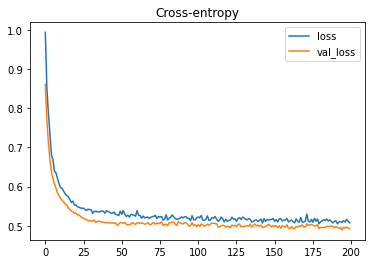

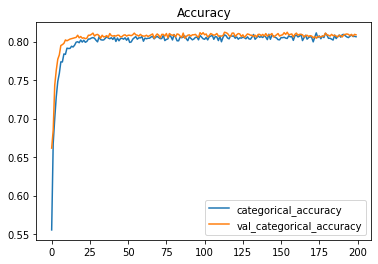

In [ ]:
import pandas as pd 

history = dnn_model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    epochs=200,
    batch_size=80,
    )
    
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['categorical_accuracy', 'val_categorical_accuracy']].plot(title="Accuracy")

## **Saving the Model**

In [ ]:
from tensorflow.keras.models import save_model
save_model(dnn_model, "model.h5")

In [ ]:
#loading the model

from tensorflow import keras
dnn_model = keras.models.load_model('/content/model (3).h5')

# **Prediction**

You can add the x_test and ytest in the form of dataframes or the whole dataframe , and put c (clean) equal to false to check your own data on this.

For eg: ill test the model on the whole dataset by importing the dataset again

In [ ]:
import pandas as pd
import numpy as np
from sklearn.compose import make_column_transformer
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from keras.utils import to_categorical

In [ ]:
# # #you can add your dataset here 
# df=pd.read_csv('/content/CBM_WM6undefined_Oct_30.csv')

# #takes the necessary columns 

# #reset the column names 
# df.columns =  ['Company Name', 'Employee Code', 'Machine', 'Production', 'Order Operation No', 'Date',
#        'Time', 'Current', 'Humidity', 'Temperature', 'Flow', 'Job Temp',
#        'Voltage', 'Defect']

# #sepetrates X_test and y_test
# X_test=df.iloc[:,:-1]
# y_test=df.iloc[:,-1]


#c stands for if data is clean 
def predict(X_test,y_test,c = True):

  if c==False:



    t = X_test
    t['Defect'] = y_test
    t = clean(t)
    t = preProcessing(t)
    X_test = t.iloc[:,:-1]

    X_test = preprocessor.transform(X_test)
    y_test = t.iloc[:,-1]
    y_test = y_test.to_numpy()


  predicted = dnn_model.predict(X_test)

  #conversion to original values using confidence scores 
  td = 0.5
  nd = 0.48
  pd = 0.5
  p=[]
  for i in predicted:


    # if i[0]>nd :
    #   p.append(0)

    if i[2]>pd  :
      p.append(2)

    elif i[1]>=td :
      p.append(1)

    else:
      p.append(0)

  return y_test,p
  

#running the predict function.

y_T , p = predict(X_test_full,y_test_full)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,1,4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


10625/10625 [==============================] - 18s 2ms/step


# **Evaluation**

## **Confusion Matrix**

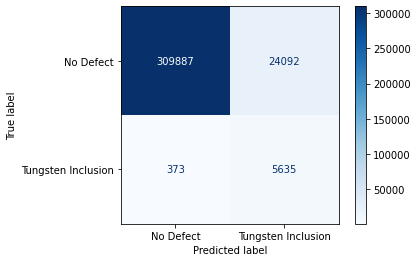

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix


labels=["No Defect", "Tungsten Inclusion","Porosity"]
cm = confusion_matrix(y_T, p)


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()

## **F1 Score**

In [ ]:
from sklearn.metrics import f1_score
f1 = f1_score(y_T,p,average='weighted')
print("F1 Score : ",f1)

F1 Score :  0.9505978774204975


# **ROI**


## **Welding Cost Distribution**


1.   Labour Cost - 85%
2.   Electric Power Cost - 2%
1.   Filler Material - 6%
2.   Shielding Gas - 3%
1.   Raw Material-4%

<br>


### **COST Functions**
The cost functions are given w.r.t time in secs.

<br>

>$Welding_{Cost}(t) = $</br>
<br>
>> $0.04 * RawMaterial$</br>
$+0.85* LabourCost(t)$ </br>
$+0.02 * Electric Power Cost(t) $</br>
$+0.06 *Filler Material Cost(t) $</br>
$+0.03 * ShieldingGas(t)$
<br><br>
These are the average weighted individual costs that add up to the welding cost.</br>
Raw Materials that are requred to weld.</br>
Labour Cost :  the cost of labour for



</br>




<br>

>$Rewelding_{Cost}(t) = $</br>
<br>
>>$0.87* LabourCost(t)$ </br>
$+0.02 * Electric Power Cost(t) $</br>
$+0.08 *Filler Material Cost(t) $</br>
$+0.03 * ShieldingGas(t)$</br>

<br>


>$NetWeldingCost_{bm} = Welding_{cost}(t) + Rewelding_{cost}(total_{defect} * t_{fix}) $</br>
<br><br>
\*bm : After Model Deployment</br>
It is the [cost of welding] for time period 't' plus the the [cost of rewelding]

<br><br>

>$NetWeldingCost_{am} = Welding_{cost}(t) + (1-Accuracy_{defect}) \cdot\ Rewelding_{cost}(total_{defect} * t_{fix})  $
<br><br>
\*am : After Model Deployment</br>
It is the [cost of welding] for time period 't' plus the the [cost of rewelding] times [1 - the accuracy with which the model detects the defects].</br>
The  **total defect** term value is assumed to be the total defects if the model was not applied.

<br>
<br>

>$Profit(t) = Accuracy_{defect} \cdot\ Rewelding_{cost}(total_{defect} * t_{fix}) $
<br><br>
It is the profit that is gained by saving up the cost of rewelds that a defect would cause by predicting it and avoiding it.
it is computed by the ***accuracy of our model to find out defects*** times the ***rewelding cost to improve or fix the defect***.</br>
The  **total defect** term value is assumed to be the total defects if the model was not applied.

<br>
<br>

>$Investment = Cost$  $of$ $Deploying$ $ Model$
<br><br>
It is the investment made in buying and deploying the required machinery to read parameter data , process , predict and take the necessary actions to prevent the defect.

<br>
<br>

>$ROI = \frac{Profit}{Investment}*100$
<br><br>
The ROI is basically the perecentage return of profit on the investment. Our model aims to reduce the re-welds that has to be done to fix the defects and save up the cost and resources consumed in the re-welds.
Thus increasing the productivity overtime.


















# **TCO**


### **Deployment Cost**
---
The Model is not harware extensive it can be easily run on a basic system so cost of deployment is cut down.<br>
Amazon S3 provides access to reliable, fast, and inexpensive data storage infrastructure.<br>
We Can use it to store the processed data and keep a record of previous data for analysis.<br>

<br>
<br>
The Pricing for the same is attached below
<br>
<br>

---
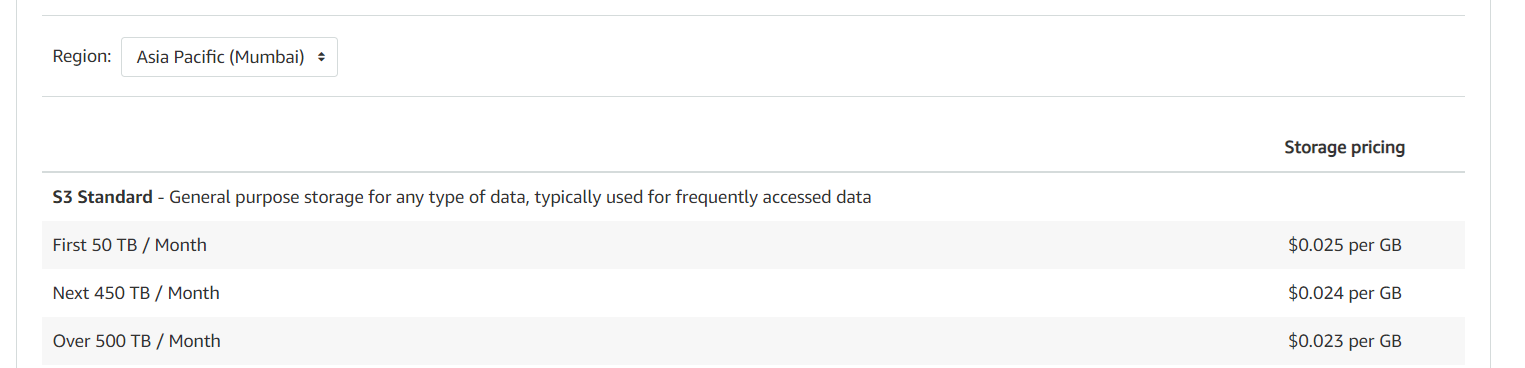




>$Deployment Cost = $</br>
<br>
> $Total Storage(TB) * 1024 * 2.00 Rs *12 = 100,000 Rs$  per annum approx.</br>
<br>
Assuming Our Data Storage to be under 4TB.</br>

</br>


<br>

### **Management Cost**
---
This includes the cost of:
>* Maintenance<br>
>*Testing<br>
>*Research & Development
</br>

This may require a team of Data Science Engineers





>$ManagementCost$</br>
<br>
 $1.5 Lakhs$
 per annum</br>
It is only a estimated Cost,(it may vary).</br>

















# **Business Impact**

## **Productivity**

---

The model aims to increase the productivity of welding and helps save the resources and time that are wasted in re-welding that has to be doe because of the defects.

The increase in time productivity can be measured by the ratio of welding time taken before model deplyment and welding time taken after model deployment.</br>
<br><br>

>$WeldingTime_{bm} = t + No._{defect}*t_{fix}$</br>
$WeldingTime_{am} = t + (1-Accuracy_{defect})*No._{defect}*t_{fix}$</br>
<br>
\*am : After Model Deployment</br>
\*bm : After Model Deployment</br>
$t$ : Duration of welding in secs.</br>
$No._{samples}$  : The number of samples of welding parameters taken during time $t$.</br>
$No._{defect}$ : The number of defects that are present in the samples during the time $t$.</br>
$t_{fix}$ : The average amount of time taken to fix one defect in secs.
<br><br>

<br><br>
>$Productivity_{increase} = \frac{WeldingTime_{bm}}{WeldingTime_{am}} * 100$



## **Labour Efficency**
---
The model can also be used to find out which welder is repeating its mistakes or their efficency. This could be used to figure out individuals mistakes and help them learn or train for defect free welding.
